# Определение закономерностей успешности игр

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

Нам будет необходимо:
* Подготовить данные: заменить названия столбцов, обработать пропуски, преобразовать данные в нужные типы.
* Посчитать суммарные продажи
* Провести исследовательский анализ данных: определить актуальные для рассмотрения периоды выхода игр, посмотреть на продажи по платформам, посмотреть на распределение игр по жанрам.
* Составить портрет пользователя каждого региона.
* Проверить гипотезы о рейтингах разных платформ и рейтингах разных жанров.
* Сформулировать вывод на какие игры стоит делать упор в рекламной компании.

<a id='content'></a>
## Оглавление

### Открытие и предобработка данных 
* [Загрузка датасета и проверка его на наличие дубликатов, пропусков и соответствие типам данных, а также правильность выгрузки](#start)

### Исследовательский анализ данных
* [Посмотрим, сколько игр выпускалось в разные годы.](#part_1.1)
* [Посмотрим, как менялись продажи по платформам.](#part_1.2)
* [Определим наиболее перспективные платформы.](#part_1.3)
* [Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков.](#part_1.4)
* [Вывод](#part_1.5)

### Портрет пользователя каждого региона
* [Северная Америка](#part_2.1)
* [Европа](#part_2.2)
* [Япония](#part_2.3)
* [Вывод](#part_2.4)

### Проверка гипотез
* [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#part_3.1)
* [Средние пользовательские рейтинги жанров Action и Sports разные.](#part_3.2)
* [Вывод](#part_3.3)

### Вывод
* [Сделаем общий вывод](#finish)

## Открытие и предобработка данных 
<a id='start'></a>
Загрузка датасета и проверка его на наличие дубликатов, пропусков и соответствие типам данных, а также правильность выгрузки

[*Назад к оглавлению*](#content)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2152,Sniper Elite V2,PS3,2012.0,Shooter,0.38,0.38,0.06,0.14,70.0,6.9,M


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Заменим названия столбцов для упрощения дальнейшей работы.

In [5]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
               'critic_score', 'user_score', 'rating']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим пропуски в данных.

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Игры с пропусками в назыании также не имеют жанра, рейтинга и оценок критиков и игроков. Также игра старая и вряд ли окажет какое-либо влияние на наш анализ, поэтому мы можем данные строки удалить.

In [8]:
data = data[~data['name'].isna()]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Рассмотрим игры с отсутствующей датой выхода.

In [10]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можем заметить, что в целом, коме отстутвия даты выхода, данные достаточно полные. Заменим пропуски на 0 - это будет означать, что даты выхода неит, но не будет мешать нам в дальнейшем при работе. Также заменим тип данных на int для урощения восприятия и работы.

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Рассмотрим уникальные значения рейтинга игр.

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Обратимся к Википедии:
* E - Everyone — Для всех
* M - Mature — Для взрослых
* T - Teen — Подросткам
* E10+ - Everyone 10 and older — Для всех от 10 лет и старше
* K-A - Kids to Adults - первоначальное обозначение E - Everyone
* AO - Adults Only 18+ — Только для взрослых
* EC - Early childhood — Для детей младшего возраста
* RP - Rating Pending — Рейтинг ожидается


Заменим обозначение *K-A* на *E*.

In [14]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Заполним все пропуски в рейтинге на *RP*

In [15]:
data['rating'] = data['rating'].fillna('RP')

Теперь рассмотрим оценки пользователей.

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можем заметить оценку *tbd* - to be determined, то есть подлежит уточнению.

Создадим отдельный столбец, где будет отмечено, была ли первоначально предоставлена информация об оценке.

In [17]:
def kind_score(row):
    if row['user_score'] == 'tbd':
        return('tbd')
    if pd.isna(row['user_score']):
        return('no rating')
    return('score')

data['user_score_kind'] = data.apply(kind_score, axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_kind
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,score
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,no rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,score
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,score
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,no rating


Теперь заменим пропуски и значения *tbd* на нули.

In [18]:
data['user_score'] = data['user_score'].fillna(0)
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'] = data['user_score'].astype('float')

In [19]:
data['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Теперь рассмотрим оценки критиков.

In [20]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Можем заметить, что у критиков нет нулевых и странных оценок, есть только пропуски. Заменим их на нули и будем иметь в виду, что это не оцененные игры.

In [21]:
data['critic_score'] = data['critic_score'].fillna(0).astype('int')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
user_score_kind    16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.8+ MB


## Исследовательский анализ данных
[*Назад к оглавлению*](#content)

Посмотрим, сколько игр выпускалось в разные годы. <a id='part_1.1'></a>

In [24]:
data_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_years

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


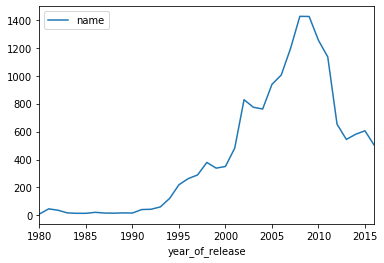

In [25]:
data_years[data_years.index > 0].plot()

Можем заметить, что до 2008-2009 наблюдался рост количества выпущенных игр, а потом пошел спад. Скорее всего это связано с тем, что с течением времени игры становились сложнее и дороже в производстве, времени на разработку требуется все больше.

До 1995 года игр выпускалось совсем мало, рассматривать их нет смысла.

Посмотрим, как менялись продажи по платформам. <a id='part_1.2'></a>

In [26]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Рассмотрим платформы с наибольшими суммарными продажами и построим распределение по годам.

In [27]:
def scatter_platforms(platform):
    fig, ax = plt.subplots()
    plt.scatter(data[(data['platform'] == platform)&(data['year_of_release'] != 0)]['year_of_release'], 
                data[(data['platform'] == platform)&(data['year_of_release'] != 0)]['sum_sales'], alpha=0.2)
    ax.grid()
    ax.set_title(platform)
    ax.set_xlabel('years')
    ax.set_ylabel('sum_sales')

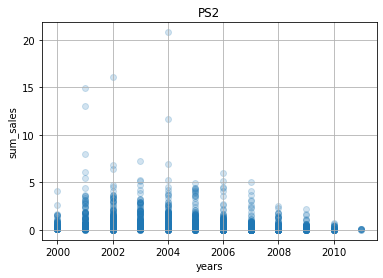

In [28]:
scatter_platforms('PS2')

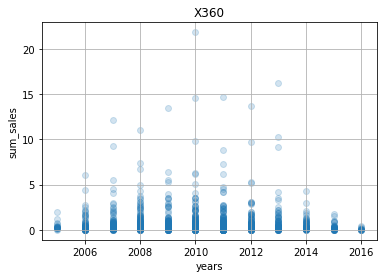

In [29]:
scatter_platforms('X360')

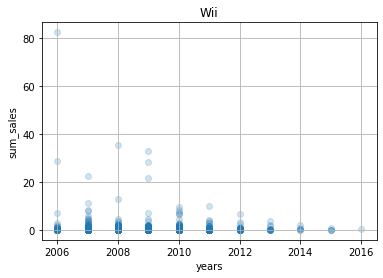

In [30]:
scatter_platforms('Wii')

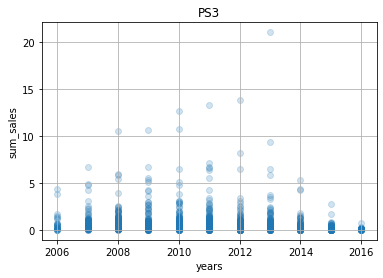

In [31]:
scatter_platforms('PS3')

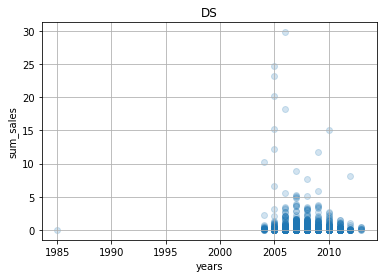

In [32]:
scatter_platforms('DS')

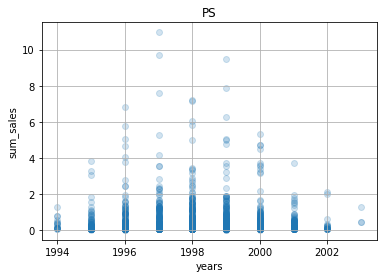

In [33]:
scatter_platforms('PS')

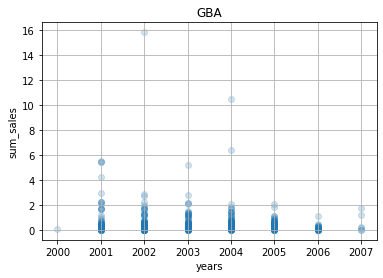

In [34]:
scatter_platforms('GBA')

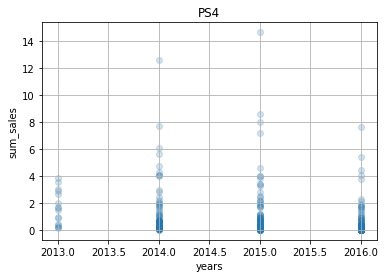

In [35]:
scatter_platforms('PS4')

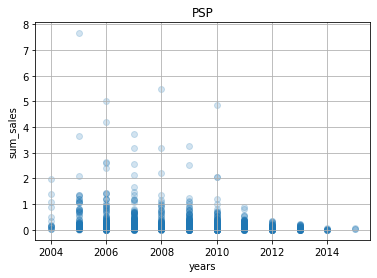

In [36]:
scatter_platforms('PSP')

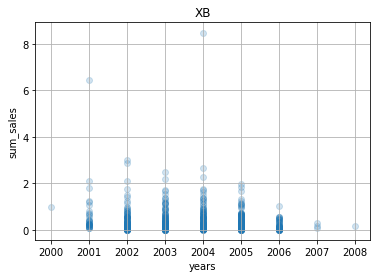

In [37]:
scatter_platforms('XB')

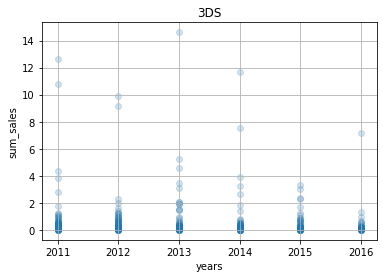

In [38]:
scatter_platforms('3DS')

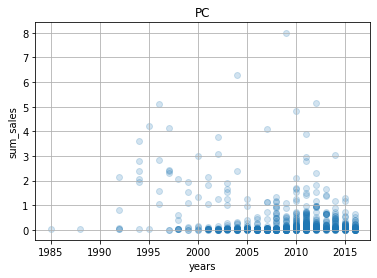

In [39]:
scatter_platforms('PC')

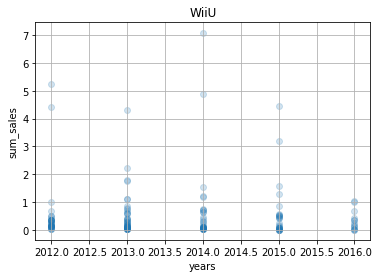

In [40]:
scatter_platforms('WiiU')

В среднем можно заметить, что платформы устаревают за 8-12 лет. Своего пика продаж платформы достигают где-то в середине. Для того, чтобы посотроить прогноз на 2017 год, будем брать данные начиная с 2013 года.

Определим наиболее перспективные платформы.  <a id='part_1.3'></a>

In [41]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='sum_sales', 
                                               aggfunc='sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Из лидирующих платформ X360, PS3, Wii, DS, PSP уже приходят к закату своей карьеры. В дальнейшем будем рассматривать наиболее перспективные платформы: PS4, 3DS, XOne, PC.

In [42]:
data_cut = data[data['year_of_release'] > 2012]
data_cut = data_cut[(data_cut['platform'] == 'PS4')|
                    (data_cut['platform'] == '3DS')|
                    (data_cut['platform'] == 'XOne')|
                    (data_cut['platform'] == 'PC')]

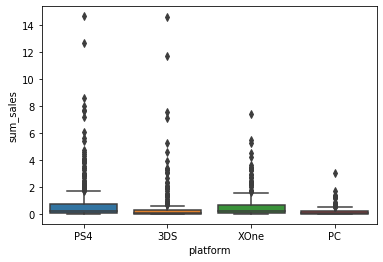

In [43]:
ax = sns.boxplot(x='platform', y='sum_sales', data=data_cut)

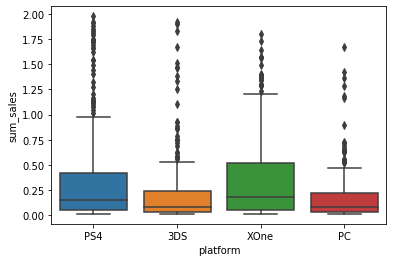

In [44]:
ax = sns.boxplot(x='platform', y='sum_sales', data=data_cut[data_cut['sum_sales'] < 2])

Можно заметить, что медианные продажи выше всего на XOne, а ниже всего - на PC. Второе и третье место заняли соответсвенно PS4 и 3DS.

Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. <a id='part_1.4'></a>

Рассмотрим PS4.

In [45]:
def platform_options(platform):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    axes[0].scatter(data_cut[(data_cut['platform'] == platform)&(data_cut['critic_score'] != 0)]['critic_score'], 
            data_cut[(data_cut['platform'] == platform)&(data_cut['critic_score'] != 0)]['sum_sales'], alpha=0.5)
    axes[0].set_title('Dependence of sales on the rating of critics')
    axes[0].set_xlabel('critic_score')
    axes[0].set_ylabel('sum_sales')
    axes[1].scatter(data_cut[(data_cut['platform'] == platform)&(data_cut['user_score_kind'] == 'score')]['user_score'], 
            data_cut[(data_cut['platform'] == platform)&(data_cut['user_score_kind'] == 'score')]['sum_sales'], alpha=0.5)
    axes[1].set_title('Dependence of sales on player ratings')
    axes[1].set_xlabel('user_score')
    axes[1].set_ylabel('sum_sales')
    
    print('Корреляция между оценкой критиков и продажами', data_cut[(data_cut['platform'] == platform)&(
        data_cut['critic_score'] != 0)]['critic_score'].corr(
        data_cut[(data_cut['platform'] == platform)&(data_cut['critic_score'] != 0)]['sum_sales']))
    print('Корреляция между оценкой игроков и продажами', data_cut[(data_cut['platform'] == platform)&(
        data_cut['user_score_kind'] == 'score')]['user_score'].corr(
        data_cut[(data_cut['platform'] == platform)&(data_cut['user_score_kind'] == 'score')]['sum_sales']))

Корреляция между оценкой критиков и продажами 0.40656790206178095
Корреляция между оценкой игроков и продажами -0.031957110204556424


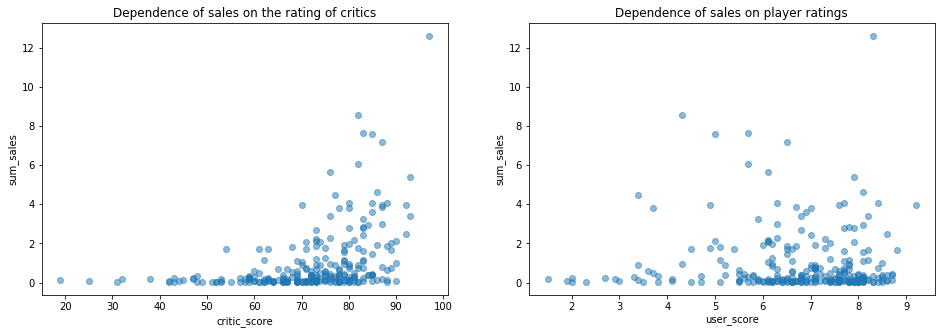

In [46]:
platform_options('PS4')

Можем заметить, что корреляция между оценками критиков и продажами более выраженная, чем между оценками игроков и продажами. Это можно объяснить тем, что в целом люди доверяют критикам - профессионалам, которые давно работают в сфере игр. Оценки же других игроков, видимо, не столь убедительны.

Проверим наши выводы на остальных трех платформах

Корреляция между оценкой критиков и продажами 0.4169983280084017
Корреляция между оценкой игроков и продажами -0.06892505328279414


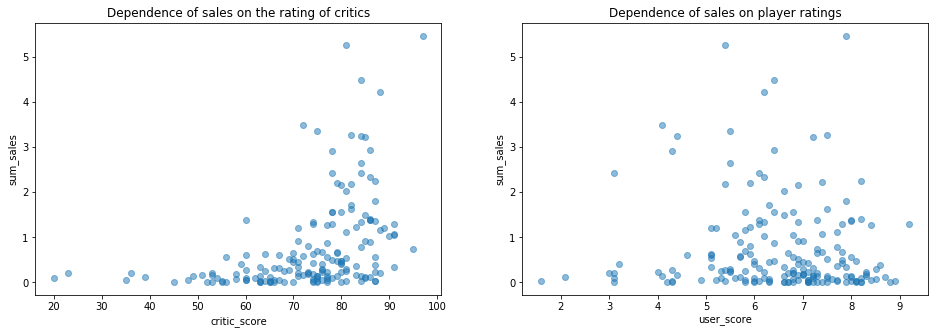

In [47]:
platform_options('XOne')

Корреляция между оценкой критиков и продажами 0.3570566142288103
Корреляция между оценкой игроков и продажами 0.24150411773563016


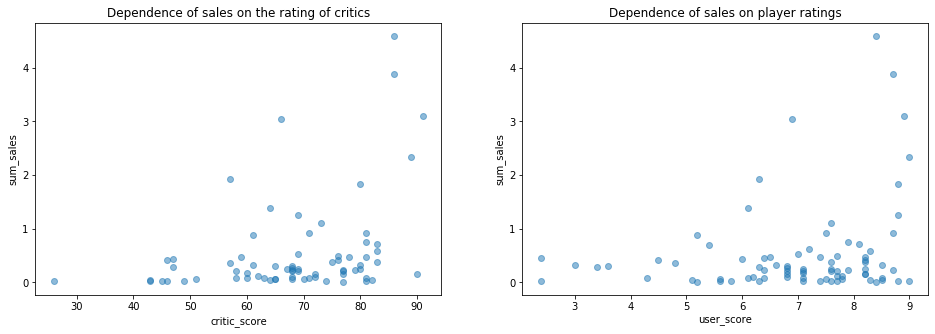

In [48]:
platform_options('3DS')

Корреляция между оценкой критиков и продажами 0.19603028294369382
Корреляция между оценкой игроков и продажами -0.0938418695247674


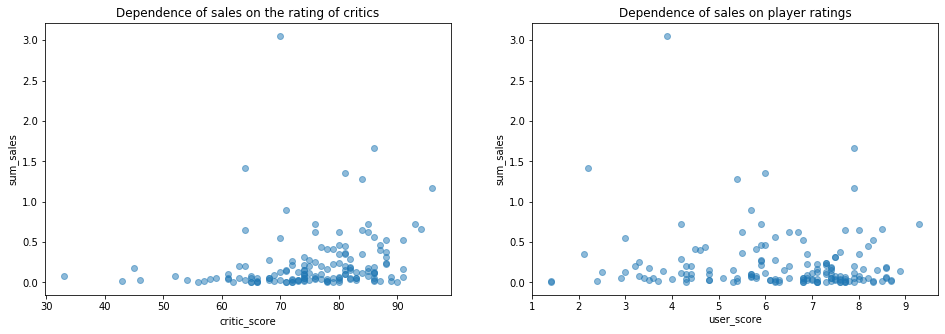

In [49]:
platform_options('PC')

Из всех платформ выделяется 3DS - на ней игроки все еще больше доверяют критикам, но прислушиваются и к другим игрокам.

Посмотрим на общее распределение игр по жанрам

In [50]:
data_cut.pivot_table(index='genre',values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
genre,
Action,174.71
Shooter,158.79
Role-Playing,111.78
Sports,86.13
Misc,23.43
Racing,22.90
Simulation,19.56
Fighting,19.41
Platform,17.48


Определенно лидируют игры жанров Action, Shooter, Role-Playing. Аутсайдером оказывается Puzzle - наверное, в них больше играют на телефонах.

### Вывод <a id='part_1.5'></a>

В ходе анализа данных мы выяснили следующее:
* Пик выпуска игр пришелся на  2008-2009 годы, дальше начался спад. Скорее всего это связано с тем, что с течением времени игры становились сложнее и дороже в производстве, времени на разработку требуется все больше.
* В среднем можно заметить, что платформы устаревают за 8-12 лет.
* Самыми перспективными для целей нашего аналиа являются следующие 4 платформы: PS4, 3DS, XOne, PC.
* Медианные продажи выше всего на XOne, а ниже всего - на PC. Второе и третье место заняли соответсвенно PS4 и 3DS.
* Корреляция между оценками критиков и продажами более выраженная, чем между оценками игроков и продажами. Это можно объяснить тем, что в целом люди доверяют критикам - профессионалам, которые давно работают в сфере игр. Оценки же других игроков, видимо, не столь убедительны.
* Определенно лидируют игры жанров Action, Shooter, Role-Playing. Аутсайдером оказывается Puzzle

## Портрет пользователя каждого региона
[*Назад к оглавлению*](#content)

Нам необходимо определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнем с NA - Северной Америки. <a id='part_2.1'></a>

In [51]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


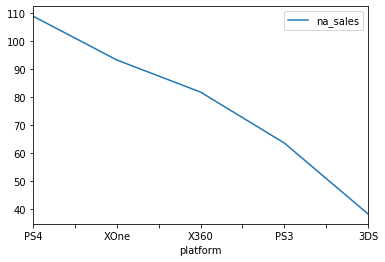

In [52]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False).head().plot()

Больше всего продаж с PS4 - это очень популярная платформа. Дальше идут XOne и X360. Продажи PS3 существенно меньше - считается, что данная серия PS была неудачной. Замыкает пятерку 3DS.

In [53]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


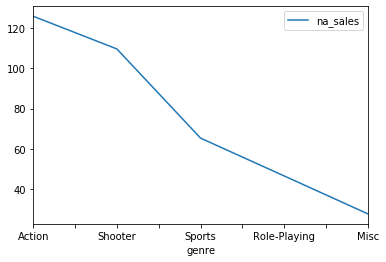

In [54]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False).head().plot()

Игроки из Северной Америки предпочитают игры жанра action. Также в топе шутеры, спортивные и ролевые игры.

Рассмотрим влияние рейтинга ESRB на продажи.

In [55]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False)

,na_sales
rating,
M,165.21
RP,89.42
E,79.05
E10+,54.24
T,49.79


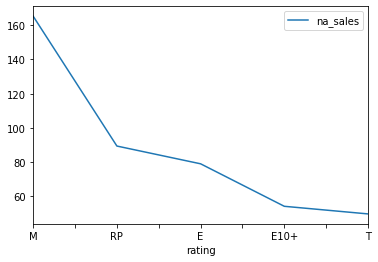

In [56]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='na_sales', 
                                               aggfunc='sum').sort_values(by = 'na_sales',ascending = False).plot()

Лидируют игры для взрослых. Также очень много нерейтингованных игр.

Рассмотрим регион EU - Европа. <a id='part_2.2'></a>

In [57]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False).head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


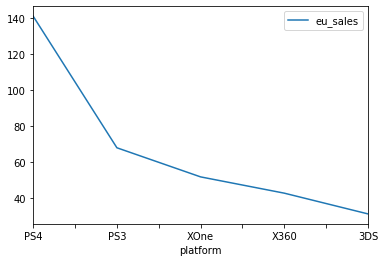

In [58]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False).head().plot()

Можем заметить, что в топ-5 представлены все те же платформы, однако PS3 вырывается вперед - она уже на втором месте. 3DS также замыкает пятерку.

In [59]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


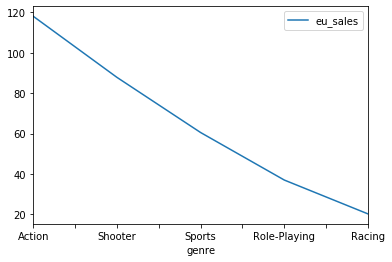

In [60]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False).head().plot()

Первые четыре места распределились аналогично Северной Америке. Однако, европейцы также любят гонки.

In [61]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False)

,eu_sales
rating,
M,145.32
E,83.36
RP,78.91
E10+,42.69
T,41.95


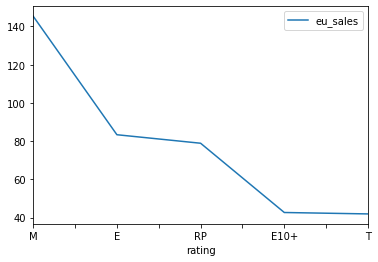

In [62]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='eu_sales', 
                                               aggfunc='sum').sort_values(by = 'eu_sales',ascending = False).plot()

И здесь ситуация аналогична Северной Америке (за исключением ожидающих рейтинга игр - тут они опустились на одну ступень ниже)

И наконец регион JP - Япония. <a id='part_2.3'></a>

In [63]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


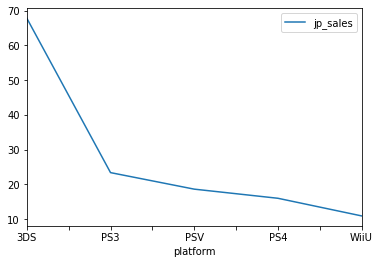

In [64]:
data[data['year_of_release'] > 2012].pivot_table(index='platform', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False).head().plot()

Можем заметить, что ситуация в Японии совершенно иная - они предпочитают платформы собственного производства. И 3DS лидирует! Видимо, они делают больший акцент на внутренний рынок.

In [65]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


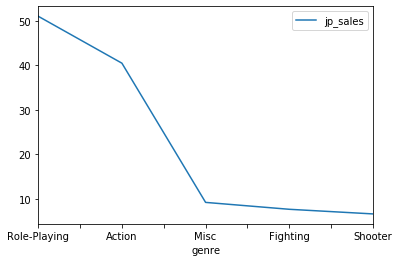

In [66]:
data[data['year_of_release'] > 2012].pivot_table(index='genre', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False).head().plot()

И в жанрах иная ситуация - на первое место вышли ролевые игры. Возможно, это связано с несколько иной культурой игр.

In [67]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False)

,jp_sales
rating,
RP,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


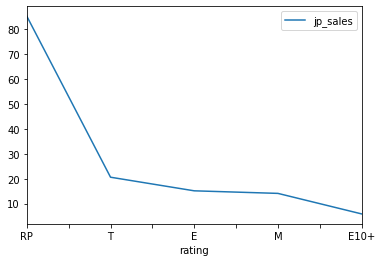

In [68]:
data[data['year_of_release'] > 2012].pivot_table(index='rating', 
                                               values='jp_sales', 
                                               aggfunc='sum').sort_values(by = 'jp_sales',ascending = False).plot()

В Японии не обращают внимания на рейтинги игр - скорее всего там это необязательно. На первом месте игры еще не получившие рейтинг.

### Вывод <a id='part_2.4'></a>

Игроки из Европы и Северной Америки похожи - им нравятся похожие жанры, они покупают игры с одним и тем же рейтингом. Несколько отличаются предпочтения по платформам, но в топ-5 одни и те же наименования.

В Японии ситуация кардинально отличается - японцы предпочитают игровые платформы собственного производства, играют в ролевые игры (в отличие от американцев и европейцев) и не обращают внимания на рейтинги ESRB.

## Проверка гипотез
[*Назад к оглавлению*](#content)

Нам необходимо проверить следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

<a id='part_3.1'></a>
Начнем с первой.
Сформулируем нулевую гипотезу:

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Тогда альтернативная гипотеза будет:

**Средние пользовательские рейтинги платформ Xbox One и PC различны.**

Для начала посмотрим, похожи ли дисперсии выборок.

In [69]:
print('Дисперсия выборки платформы Xbox One равна', np.var(data_cut[(data_cut['user_score_kind'] == 'score')&
                                                                    (data_cut['platform'] == 'XOne')]['user_score']))
print('Дисперсия выборки платформы PC равна', np.var(data_cut[(data_cut['user_score_kind'] == 'score')&
                                                                       (data_cut['platform'] == 'PC')]['user_score']))

Дисперсия выборки платформы Xbox One равна 1.8965188383045526
Дисперсия выборки платформы PC равна 3.016306347554631


Дисперсии, очевидно, различны.

In [70]:
alpha = 0.05

results = st.ttest_ind(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['platform'] == 'XOne')]['user_score'], 
                       data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['platform'] == 'PC')]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Построим гистограмы распределений, чтобы посмотреть, действительно ли результаты похожи на действительность.

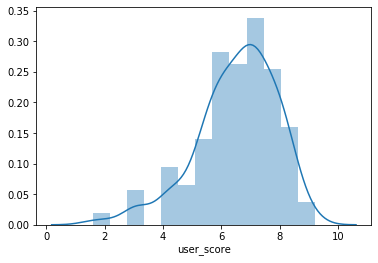

In [71]:
ax = sns.distplot(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['platform'] == 'XOne')]['user_score'])

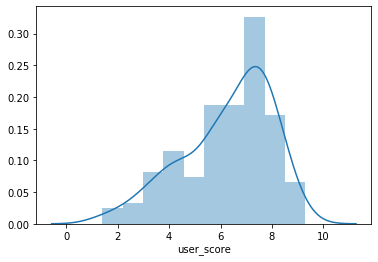

In [72]:
ax = sns.distplot(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['platform'] == 'PC')]['user_score'])

Очевидно, что на рейтинги действительно похожи.

<a id='part_3.2'></a>
Рассмотрим вторую гипотезу. Пойдем от обратного и сформулируем нулевую гипотезу:

**Средние пользовательские рейтинги жанров Action и Sports одинаковы.**

Тогда альтернативная гипотеза будет:

**Средние пользовательские рейтинги жанров Action и Sports различны.**

In [73]:
print('Дисперсия выборки жанра Action равна', np.var(data_cut[(data_cut['user_score_kind'] == 'score')&
                                                                    (data_cut['genre'] == 'Action')]['user_score']))
print('Дисперсия выборки жанра Sports равна', np.var(data_cut[(data_cut['user_score_kind'] == 'score')&
                                                                       (data_cut['genre'] == 'Sports')]['user_score']))

Дисперсия выборки жанра Action равна 1.748367561983471
Дисперсия выборки жанра Sports равна 2.404196597353497


Дисперсии, очевидно, различны.

In [74]:
alpha = 0.05

results = st.ttest_ind(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['genre'] == 'Action')]['user_score'], 
                       data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['genre'] == 'Sports')]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.502568396354856e-10
Отвергаем нулевую гипотезу


Так как мы шли от обратного, соответственно, рейтинги жанров Action и Sports должны быть различны. Построим гистограмы и посмотрим.

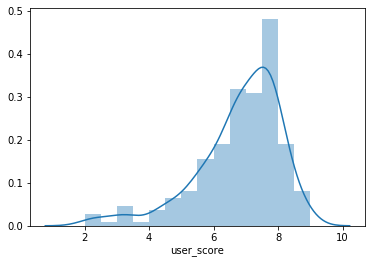

In [75]:
ax = sns.distplot(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['genre'] == 'Action')]['user_score'])

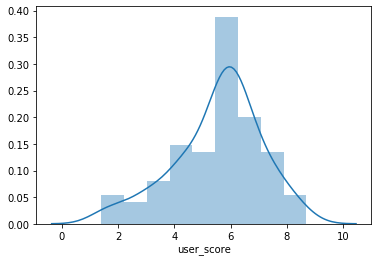

In [76]:
ax = sns.distplot(data_cut[(data_cut['user_score_kind'] == 'score')&(data_cut['genre'] == 'Sports')]['user_score'])

Действительно, оценки игр жанра Action выше - они составляют около 8 баллов, в то время как спортивные игры получили от игроков только 6.

### Вывод 
<a id='part_3.3'></a>

Мы не смогли отвергнуть первую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

И подтвердили вторую: Средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод
<a id='finish'></a>

[*Назад к оглавлению*](#content)

В результате проделанной работы можно сделать следующие выводы:
* Пик выпуска игр пришелся на  2008-2009 годы, дальше начался спад. Скорее всего это связано с тем, что с течением времени игры становились сложнее и дороже в производстве, времени на разработку требуется все больше.
* В среднем можно заметить, что платформы устаревают за 8-12 лет.
* Самыми перспективными для целей нашего аналиа являются следующие 4 платформы: PS4, 3DS, XOne, PC.
* Медианные продажи выше всего на XOne, а ниже всего - на PC. Второе и третье место заняли соответсвенно PS4 и 3DS.
* Корреляция между оценками критиков и продажами более выраженная, чем между оценками игроков и продажами. Это можно объяснить тем, что в целом люди доверяют критикам - профессионалам, которые давно работают в сфере игр. Оценки же других игроков, видимо, не столь убедительны.
* Определенно лидируют игры жанров Action, Shooter, Role-Playing. Аутсайдером оказывается Puzzle
* Игроки из Европы и Северной Америки похожи - им нравятся похожие жанры, они покупают игры с одним и тем же рейтингом. Несколько отличаются предпочтения по платформам, но в топ-5 одни и те же наименования. Игроки предпочитают игры жанра action. Также в топе шутеры, спортивные и ролевые игры. 
* Игроки из Европы и Северной Америки в основном играют в игры для взрослых. На второе и третье место делят игры для всех и игры без рейтинга.
* В Японии ситуация кардинально отличается - японцы предпочитают игровые платформы собственного производства, играют в ролевые игры (в отличие от американцев и европейцев) и не обращают внимания на рейтинги ESRB.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports различны.

Для компании на 2017 год можно посоветовать следующее:
* Особый упор следует делать на платформы PS4, 3DS, XOne, PC.
* Для регионов Европы и Северной Америки важны жанры Action, Shooter.
* Для Японии лучше продвигать игры Role-Playing.
* Для регионов Европы и Северной Америки необходимо обратить внимание на рейтинг ESRB - чаще всего играют в игры рейтинга E и M, для Японии рейтинг не так важен.
* Больший упор стоит делать на игры с хорошими оценками критиков - люди любят играть в хорошо оцененные игры.
* Оценки играков не так важны.